# Small Business Administration Loan Approval

## Data Cleaning

### Bagja Satiaraharja

**Dataset:** SBA Loan Dataset | **Source:** [Kaggle](https://www.kaggle.com/mirbektoktogaraev/should-this-loan-be-approved-or-denied)

The dataset is from the U.S. Small Business Administration (SBA)

The U.S. SBA was founded in 1953 on the principle of promoting and assisting small enterprises in the U.S. credit market (SBA Overview and History, US Small Business Administration (2015)). Small businesses have been a primary source of job creation in the United States; therefore, fostering small business formation and growth has social benefits by creating job opportunities and reducing unemployment.

There have been many success stories of start-ups receiving SBA loan guarantees such as FedEx and Apple Computer. However, there have also been stories of small businesses and/or start-ups that have defaulted on their SBA-guaranteed loans.

In this final project, I will build a Flask-based web app that can recommend whether the loan is approved or not based on the given term and loan condition. 

### Import Data & Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [3]:
SBA = pd.read_csv('SBAnational.csv')
SBA.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [4]:
len(SBA)

899164

With the given dataset, we have around 899164 rows of SBA Loan historical data.

**Columns**

1. LoanNr_ChkDgt     : Identifier
2. Name              : Borrower Name
3. City              : Borrower City
4. State             : Borrower State
5. Zip               : Borrower Zip Code
6. Bank              : Bank Name
7. BankState         : Bank State
8. NAICS             : North American industry classification system code.
9. ApprovalDate      : Date SBA commitment issued
10. ApprovalFY        : Fiscal year of commitment
11. Term              : Loan term in months
12. NoEmp             : Number of Business Employees
13. NewExist          : 1 = Existing business, 2 = New business
14. CreateJob         : Number of Jobs Created
15. RetainedJob       : Number of jobs retained
16. FranchiseCode     : Franchise code, (00000 or 00001) = No franchise
17. UrbanRural        : 1 = Urban, 2 = rural, 0 = undefined
18. RevLineCr         : Revolving line of credit: Y = Yes, N = No
19. LowDoc            : LowDoc Loan Program: Y = Yes, N = No
20. ChgOffDate        : The date when a loan is declared to be in default
21. DisbursementDate  : Disbursement date
22. DisbursementGross : Amount disbursed
23. BalanceGross      : Gross amount outstanding
24. MIS_Status        : Loan status charged off = CHGOFF, Paid in full = PIF
25. ChgOffPrinGr      : Charged-off amount
26. GrAppv            : Gross amount of loan approved by bank
27. SBA_Appv          : SBA's guaranteed amount of approved loan

## Exploratory Data Analysis

The first step of this project is to identify the dataset and its feature through exploratory data analysis (EDA). In this step we will analyze the type and condition from all feature from Small Business Administration Dataset.

In [5]:
SBA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
LoanNr_ChkDgt        899164 non-null int64
Name                 899150 non-null object
City                 899134 non-null object
State                899150 non-null object
Zip                  899164 non-null int64
Bank                 897605 non-null object
BankState            897598 non-null object
NAICS                899164 non-null int64
ApprovalDate         899164 non-null object
ApprovalFY           899164 non-null object
Term                 899164 non-null int64
NoEmp                899164 non-null int64
NewExist             899028 non-null float64
CreateJob            899164 non-null int64
RetainedJob          899164 non-null int64
FranchiseCode        899164 non-null int64
UrbanRural           899164 non-null int64
RevLineCr            894636 non-null object
LowDoc               896582 non-null object
ChgOffDate           162699 non-null object
DisbursementDate 

In [6]:
SBA.describe()

,LoanNr_ChkDgt,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural
count,8.991640e+05,899164.000000,899164.000000,899164.000000,899164.000000,899028.000000,899164.000000,899164.000000,899164.000000,899164.000000
mean,4.772612e+09,53804.391241,398660.950146,110.773078,11.411353,1.280404,8.430376,10.797257,2753.725933,0.757748
std,2.538175e+09,31184.159152,263318.312759,78.857305,74.108196,0.451750,236.688165,237.120600,12758.019136,0.646436
min,1.000014e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.589758e+09,27587.000000,235210.000000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,4.361439e+09,55410.000000,445310.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,6.904627e+09,83704.000000,561730.000000,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,1.000000
max,9.996003e+09,99999.000000,928120.000000,569.000000,9999.000000,2.000000,8800.000000,9500.000000,99999.000000,2.000000


In [7]:
list_item = []
for col in SBA.columns:
    list_item.append([col, SBA[col].dtype, SBA[col].isna().sum(), round((SBA[col].isna().sum()/len(SBA[col]))*100,2),
                      SBA[col].nunique(), list(SBA[col].sample(5).drop_duplicates().values)])

dfDesc = pd.DataFrame(columns=['feature', 'data_type', 'null', 'nulPct', 'unique', 'uniqueSample'],data=list_item)

In [8]:
dfDesc

,feature,data_type,null,nulPct,unique,uniqueSample
0,LoanNr_ChkDgt,int64,0,0.00,899164,"[2558815007, 1813675006, 3707514003, 911718300..."
1,Name,object,14,0.00,779583,"[David B Steiner, SYLVAN LEARNING CENTER OF DE..."
2,City,object,30,0.00,32581,"[QUEEN CREEK, HUMBLE, ADDISON, DUBLIN, EAST NO..."
3,State,object,14,0.00,51,"[NJ, CA, PA]"
4,Zip,int64,0,0.00,33611,"[90241, 94107, 54703, 95831, 98004]"
5,Bank,object,1559,0.17,5802,"[UNITED SECURITY BANK, READYCAP LENDING, LLC, ..."
6,BankState,object,1566,0.17,56,"[VA, MO, NY, RI, CA]"
7,NAICS,int64,0,0.00,1312,"[448140, 445299, 722211, 0, 713990]"
8,ApprovalDate,object,0,0.00,9859,"[15-Jun-07, 12-Jan-84, 25-Apr-03, 7-Apr-92, 6-..."
9,ApprovalFY,object,0,0.00,70,"[2007, 1999, 2008, 2004, 2000]"


## 1. Feature Selection

After conducting exploratory data analysis, the next step is to do a feature selection by analyzing the correlation between all features and target features.

### Target Feature (Y)

The feature that will be labeled as the target is the `MIS_Status` feature. Where in this feature explains which borrower cannot repay loans.

### Train Feature (X)

**1. Personal & Institusion Information Feature**

From SBA Data Frame  we can make a conclusion that there are seven column that give personal and instituion information
- `LoanNr_ChkDgt` as borrower Identifeir
- `Name` as Borrower Name
- `City` as Borrower City
- `State` as Borrower State
- `Zip` as Borrower Zip Code
- `Bank` as Bank Name
- `BankState` as Bank State
- `FranchiseCode` as FranchiseCode
- `UrbanRural` as information about business

This information is used only to identify the borrower and the Bank. With that reason we not use this feature for future modeling.

**2. NAICS (North American industry classification system code)**

NAICS is a classification system of several types of industries registered in America. The first two digits of NAICS explained the type of business industries.

NAICS itself has the potential for decision making. The type of industry will affect the company's performance in business. So that this feature will be used later in the model.

**3. Date and Time Feature**

It's dataset contained some feature that explains the date of commitment and disbursement.
- `ApprovalDate`      : Date SBA commitment issued
- `ApprovalFY`       : Fiscal year of commitment
- `ChgOffDate`        : The date when a loan is declared to be in default
- `DisbursementDate`  : Disbursement date

Because the model will be deployed following the operating time of the Bank, this feature is used only for additional information and not for modeling.

**4. Term**

The term provides information on how long the loan will take. Concerning the rules of risk management, the longer the duration, the greater the uncertainty that will lead to risk. So this feature will be used as a reference for modeling.

**5. Jobs Columns**

This feature explains how many employees are in the related business and how many jobs were created and existed before.

In this dataset there are three features: `NoEmp`, `CreateJob` dan `RetainedJob`

In [10]:
def outliers(DataFrame,Series):
    iqr = Series.quantile(.75) - Series.quantile(.25)
    lower_bound = Series.quantile(.25) - (1.5*iqr)
    upper_bound = Series.quantile(.75) + (1.5*iqr)
    return DataFrame[(Series >= upper_bound) | (Series <= lower_bound)]

In [11]:
# Persentasi Outliers NoEmp Feature
print(f'Persentase outliers: {round(len(outliers(SBA,SBA.NoEmp))/len(SBA.NoEmp)*100,2)}%')

Persentase outliers: 11.39%


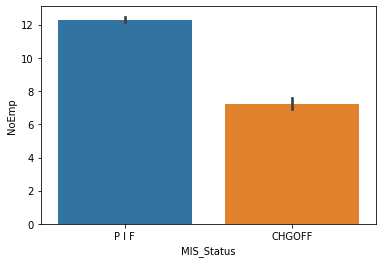

In [12]:
sns.barplot(x=SBA.MIS_Status, y=SBA['NoEmp'])

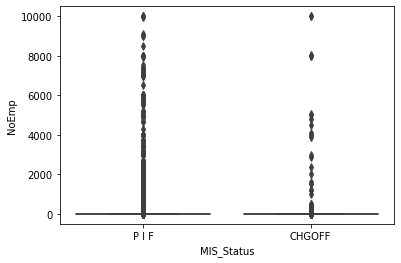

In [13]:
sns.boxplot(x=SBA.MIS_Status, y=SBA['NoEmp'])

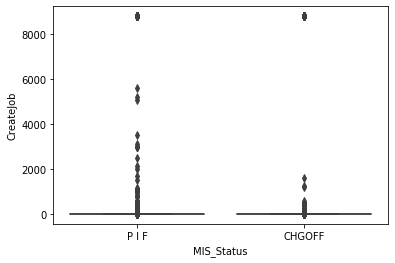

In [14]:
sns.boxplot(x= SBA['MIS_Status'],y=SBA['CreateJob'])

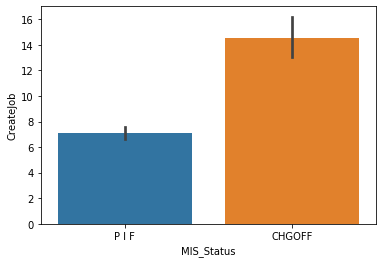

In [15]:
sns.barplot(x=SBA.MIS_Status,y=SBA.CreateJob)

In [16]:
# Persentasi Outliers CreateJob Feature
print(f'Persentase outliers: {round(len(outliers(SBA,SBA.CreateJob))/len(SBA.CreateJob)*100,2)}%')

Persentase outliers: 16.56%


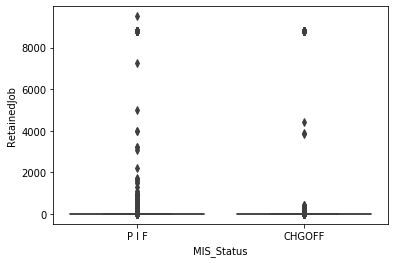

In [17]:
sns.boxplot(x= SBA['MIS_Status'],y=SBA['RetainedJob'])

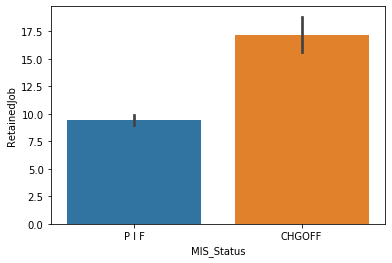

In [18]:
sns.barplot(x=SBA.MIS_Status,y=SBA.RetainedJob)

In [19]:
# Persentasi Outliers RetainedJob Feature
print(f'Persentase outliers: {round(len(outliers(SBA,SBA.RetainedJob))/len(SBA.CreateJob)*100,2)}%')

Persentase outliers: 11.8%


In [20]:
SBA[['MIS_Status','NoEmp','CreateJob','RetainedJob']].corr()

,NoEmp,CreateJob,RetainedJob
NoEmp,1.000000,0.008626,0.015350
CreateJob,0.008626,1.000000,0.993953
RetainedJob,0.015350,0.993953,1.000000


By looking at the correlation between default and the number of jobs created, the `NoEmp`, `CreateJob` and `RetainedJob` features will not be included in the modeling.

**6. New Exist**

Explain the business conditions, is it a new or existing business.

In [21]:
SBA.NewExist.unique()

array([ 2.,  1.,  0., nan])

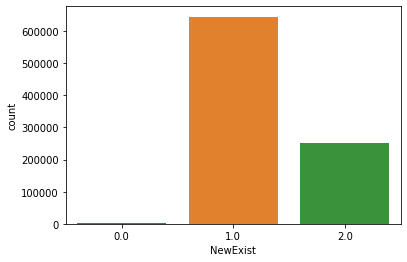

In [22]:
sns.countplot(SBA.NewExist)

New and existing businesses have different risks in the business condition. We will use this feature to make a decision in modeling.

**8. Loan Transaction Type Feature**

There are two features for loan transaction:
- `RevLineCr`         : Revolving line of credit which means that if the loan has been paid, the borrower can be able to immediately borrow again.
- `LowDoc`            : LowDoc Loan Program means the borrower can borrow with little administration.

The loan transaction type will affects the level of risk and financial psychology. Then this feature will be used as consideration in the approval model.

**11. Amount of Loan**

All this five feature explains the amount of loan and its payment balance. 

- `DisbursementGross` : Amount disbursed
- `BalanceGross`      : Gross amount outstanding
- `ChgOffPrinGr`      : Charged-off amount
- `GrAppv`            : Gross amount of loan approved by bank
- `SBA_Appv`          : SBA's guaranteed amount of approved loan

Since `DisbursementGross`, `BalanceGross` and `ChgOffPrinGr` only explain the balance of the loan and not used for loan approval, so the feature can be ignored.

In [23]:
SBA[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv','SBA_Appv']]

,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
0,"$60,000.00",$0.00,$0.00,"$60,000.00","$48,000.00"
1,"$40,000.00",$0.00,$0.00,"$40,000.00","$32,000.00"
2,"$287,000.00",$0.00,$0.00,"$287,000.00","$215,250.00"
3,"$35,000.00",$0.00,$0.00,"$35,000.00","$28,000.00"
4,"$229,000.00",$0.00,$0.00,"$229,000.00","$229,000.00"
...,...,...,...,...,...
899159,"$70,000.00",$0.00,$0.00,"$70,000.00","$56,000.00"
899160,"$85,000.00",$0.00,$0.00,"$85,000.00","$42,500.00"
899161,"$300,000.00",$0.00,$0.00,"$300,000.00","$225,000.00"
899162,"$75,000.00",$0.00,"$46,383.00","$75,000.00","$60,000.00"


In [25]:
SBA.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [26]:
# Drop unused feature
data = SBA.drop(['LoanNr_ChkDgt', 'Name','City', 'State', 'Zip','Bank','BankState','ApprovalDate','ApprovalFY',
                 'NoEmp','CreateJob','RetainedJob','FranchiseCode','UrbanRural', 'ChgOffDate','DisbursementDate','BalanceGross',
                 'DisbursementGross','ChgOffPrinGr'], axis=1)

In [27]:
data

,NAICS,Term,NewExist,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv
0,451120,84,2.0,N,Y,P I F,"$60,000.00","$48,000.00"
1,722410,60,2.0,N,Y,P I F,"$40,000.00","$32,000.00"
2,621210,180,1.0,N,N,P I F,"$287,000.00","$215,250.00"
3,0,60,1.0,N,Y,P I F,"$35,000.00","$28,000.00"
4,0,240,1.0,N,N,P I F,"$229,000.00","$229,000.00"
...,...,...,...,...,...,...,...,...
899159,451120,60,1.0,0,N,P I F,"$70,000.00","$56,000.00"
899160,451130,60,1.0,Y,N,P I F,"$85,000.00","$42,500.00"
899161,332321,108,1.0,N,N,P I F,"$300,000.00","$225,000.00"
899162,0,60,1.0,N,Y,CHGOFF,"$75,000.00","$60,000.00"


In [28]:
data.MIS_Status.value_counts()

P I F     739609
CHGOFF    157558
Name: MIS_Status, dtype: int64

## 2. Data Cleaning

### Null and NaN

From the EDA before, we know that there are some NaN and Null data. Since only a few data with NaN and Null condition, we can drop the data with this condition.

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 8 columns):
NAICS         899164 non-null int64
Term          899164 non-null int64
NewExist      899028 non-null float64
RevLineCr     894636 non-null object
LowDoc        896582 non-null object
MIS_Status    897167 non-null object
GrAppv        899164 non-null object
SBA_Appv      899164 non-null object
dtypes: float64(1), int64(2), object(5)
memory usage: 54.9+ MB


In [30]:
data.dropna(inplace=True)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889938 entries, 0 to 899163
Data columns (total 8 columns):
NAICS         889938 non-null int64
Term          889938 non-null int64
NewExist      889938 non-null float64
RevLineCr     889938 non-null object
LowDoc        889938 non-null object
MIS_Status    889938 non-null object
GrAppv        889938 non-null object
SBA_Appv      889938 non-null object
dtypes: float64(1), int64(2), object(5)
memory usage: 61.1+ MB


### **Categorical Data Cleaning**

Some categorical data have an unidentified category. We need to make sure all this category in accordance with the actual condition when the model is running.

In [32]:
list_item = []
for col in data.columns:
    list_item.append([col, data[col].dtype, data[col].isna().sum(), round((data[col].isna().sum()/len(data[col]))*100,2),
                      data[col].nunique(), list(data[col].sample(5).drop_duplicates().values)])

dataDesc = pd.DataFrame(columns=['feature', 'data_type', 'null', 'nulPct', 'unique', 'uniqueSample'],data=list_item)

In [33]:
dataDesc

,feature,data_type,null,nulPct,unique,uniqueSample
0,NAICS,int64,0,0.0,1311,"[0, 721214, 722320, 238220, 339116]"
1,Term,int64,0,0.0,411,"[84, 60, 120, 288, 136]"
2,NewExist,float64,0,0.0,3,[1.0]
3,RevLineCr,object,0,0.0,18,"[Y, N, 0]"
4,LowDoc,object,0,0.0,8,"[Y, N]"
5,MIS_Status,object,0,0.0,2,"[P I F, CHGOFF]"
6,GrAppv,object,0,0.0,21958,"[$170,000.00 , $44,200.00 , $40,000.00 , $50,0..."
7,SBA_Appv,object,0,0.0,38033,"[$12,500.00 , $20,000.00 , $120,000.00 , $7,50..."


In [34]:
for x in data[['NewExist', 'RevLineCr','LowDoc','MIS_Status']].columns:
    print(f'{x}: \n{data[x].unique()}\n')

NewExist: 
[2. 1. 0.]

RevLineCr: 
['N' '0' 'Y' 'T' '`' ',' '1' 'C' '3' '2' 'R' '7' 'A' '5' '.' '4' '-' 'Q']

LowDoc: 
['Y' 'N' 'C' '1' 'S' 'R' 'A' '0']

MIS_Status: 
['P I F' 'CHGOFF']



**NAICS Feature**

We need to make sure all samples have six digits NAICS code, so the data that don't have any NAICS code can be drop.

In [35]:
data[data['NAICS']==0]

,NAICS,Term,NewExist,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv
3,0,60,1.0,N,Y,P I F,"$35,000.00","$28,000.00"
4,0,240,1.0,N,N,P I F,"$229,000.00","$229,000.00"
6,0,45,2.0,N,N,CHGOFF,"$600,000.00","$499,998.00"
9,0,84,2.0,N,Y,P I F,"$70,000.00","$56,000.00"
13,0,120,2.0,N,N,P I F,"$370,000.00","$277,500.00"
...,...,...,...,...,...,...,...,...
899153,0,119,1.0,0,N,CHGOFF,"$142,000.00","$106,500.00"
899154,0,60,1.0,0,N,P I F,"$10,000.00","$5,000.00"
899158,0,84,2.0,N,Y,P I F,"$79,000.00","$63,200.00"
899162,0,60,1.0,N,Y,CHGOFF,"$75,000.00","$60,000.00"


In [36]:
data.NAICS
NAICSTrue = 0
NAICSFalse = 0
for i in data.NAICS.astype(str):
    if len(i) == 6:
        NAICSTrue += 1
    else:
        NAICSFalse += 1
print(NAICSTrue)
print(NAICSFalse)

690456
199482


In [37]:
data = data[data.NAICS != 0]

**NewExist Feature**

We can only classify business with new and existing business. Others data with different code can be ignored

In [38]:
# NewExist
# 1 = Existing Business
# 2 = New Business
data.NewExist.value_counts()

1.0    498467
2.0    191260
0.0       729
Name: NewExist, dtype: int64

In [39]:
data = data[(data.NewExist == 1.0) | (data.NewExist == 2.0)]
data.NewExist.value_counts()

1.0    498467
2.0    191260
Name: NewExist, dtype: int64

**RevLineCr Feature**

Since there are only two condition for the revolving credit line, other data must be drop from dataset.

In [40]:
# Revolving line of credit (RevLineCr)
# Y = Yes
# N = No
data.RevLineCr.value_counts()

N    267411
0    214032
Y    193682
T     14557
1        14
R        14
`         5
2         5
C         2
7         1
-         1
Q         1
A         1
,         1
Name: RevLineCr, dtype: int64

In [41]:
data = data[(data.RevLineCr == 'Y') | (data.RevLineCr == 'N')]
data.RevLineCr.value_counts()

N    267411
Y    193682
Name: RevLineCr, dtype: int64

**LowDoc Feature**

Since there are only two condition for the LowDoc condition, other data must be drop from dataset.

In [42]:
# LowDoc Loan Program
# Y = Yes
# N = No
data.LowDoc.value_counts()

N    434155
Y     25142
S       565
C       557
0       512
A       104
R        57
1         1
Name: LowDoc, dtype: int64

In [43]:
data = data[(data.LowDoc == 'Y') | (data.LowDoc == 'N')]
data.LowDoc.value_counts()

N    434155
Y     25142
Name: LowDoc, dtype: int64

### Data Type Standardization

Some of the data came with string type for numerical feature. We need to standardize all this condition to make sure the model read the feature as numerical data.

**Currency Cleaning**

In [44]:
def currencyCleaning(x):
    x = x[1:].replace(',','')
    return x

In [45]:
data['GrAppv'] = data['GrAppv'].apply(currencyCleaning).astype(float).astype(int)
data['SBA_Appv'] = data['SBA_Appv'].apply(currencyCleaning).astype(float).astype(int)

## 3. Feature Engineering

Because machine learning algorithm use numerical data for considering the model. We need to do feature engineeing to modifiy the feature for modeling.

**NAICS**

- 11 : Agriculture, forestry, fishing and hunting
- 21 : Mining, quarrying, and oil and gas extraction
- 22 : Utilities
- 23 : Construction
- 31-33 : Manufacturing
- 42 : Wholesale trade
- 44-45 : Retail trade
- 48-49 : Transportation and warehousing
- 51 : Information
- 52 : Finance and insurance
- 53 : Real estate and rental and leasing
- 54 : Professional, scientific, and technical services
- 55 : Management of companies and enterprises
- 56 : Administrative/support & waste management/remediation Service
- 61 : Educational services
- 62 : Health care and social assistance
- 71 : Arts, entertainment, and recreation
- 72 : Accommodation and food services
- 81 : Other services (except public administration)
- 92 : Public administration

In [46]:
# Join NAICS with similar industry
def naicsEngineering(x):
    x = str(x)
    x = x[:2]
    if (x == '31') | (x == '32') | (x == '33'):
        x = '31-33'
    elif (x == '44') | (x == '45'):
        x = '44-45'
    elif (x == '48') | (x == '49'):
        x = '48-49'
    return x

In [47]:
data.NAICS = data.NAICS.apply(naicsEngineering)

In [48]:
(data)

,NAICS,Term,NewExist,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv
0,44-45,84,2.0,N,Y,P I F,60000,48000
1,72,60,2.0,N,Y,P I F,40000,32000
2,62,180,1.0,N,N,P I F,287000,215250
5,31-33,120,1.0,N,N,P I F,517000,387750
7,81,84,2.0,N,Y,P I F,45000,36000
...,...,...,...,...,...,...,...,...
899145,23,60,1.0,Y,N,P I F,25000,12500
899146,31-33,240,1.0,N,N,P I F,189000,189000
899157,31-33,36,1.0,N,N,P I F,200000,150000
899160,44-45,60,1.0,Y,N,P I F,85000,42500


In [49]:
# get dummy
NAICS = pd.get_dummies(data['NAICS'], prefix='NAICS', drop_first=False)
RevLineCr = pd.get_dummies(data['RevLineCr'], drop_first=True)
LowDoc = pd.get_dummies(data['LowDoc'], drop_first=True)
MIS_Status = pd.get_dummies(data['MIS_Status'], drop_first=True)

In [50]:
data.drop(['NAICS', 'RevLineCr', 'LowDoc', 'MIS_Status'], axis=1, inplace=True)

In [51]:
data['RevLineCr'] = RevLineCr['Y']
data['LowDoc'] = LowDoc['Y']
data = pd.concat([data,NAICS,MIS_Status], axis=1)

In [52]:
data = data.rename(columns={'P I F':'Approve'})
data

,Term,NewExist,GrAppv,SBA_Appv,RevLineCr,LowDoc,NAICS_11,NAICS_21,NAICS_22,NAICS_23,NAICS_31-33,NAICS_42,NAICS_44-45,NAICS_48-49,NAICS_51,NAICS_52,NAICS_53,NAICS_54,NAICS_55,NAICS_56,NAICS_61,NAICS_62,NAICS_71,NAICS_72,NAICS_81,NAICS_92,Approve
0,84,2.0,60000,48000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,60,2.0,40000,32000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,180,1.0,287000,215250,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
5,120,1.0,517000,387750,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,84,2.0,45000,36000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899145,60,1.0,25000,12500,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
899146,240,1.0,189000,189000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
899157,36,1.0,200000,150000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
899160,60,1.0,85000,42500,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## 4. Export CSV file

The last step of this stage is to save the cleaned data into CSV format. So it can be used for a later stage

In [53]:
data.to_csv('SBA_Loan_Data.csv')

In [ ]:
# def build_feature_importance(model, X_train, y_train):
    
#     models = RandomForestClassifier(criterion='entropy', random_state=11, oob_score=True, n_jobs=-1, \
#                            max_depth=25, min_samples_leaf=80, min_samples_split=3, n_estimators=70)
#     models.fit(X_train, y_train)
#     data = pd.DataFrame(models.feature_importances_, X_train.columns, columns=["feature"])
#     data = data.sort_values(by='feature', ascending=False).reset_index()
#     plt.figure(figsize=[6,6])
#     sns.barplot(x='index', y='feature', data=data[:10], palette="Blues_d")
#     plt.title('Feature inportance of Random Forest after Grid Search')
#     plt.xticks(rotation=45)
#     plt.show();
    
# build_feature_importance(RandomForestClassifier, X_train, y_train)